In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
sns.set(style='white')

In [14]:
test_1_file = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/latent_controller/expert_evaluation_test1.csv"
test_2_file = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/latent_controller/expert_evaluation_test2.csv"
test_final_file = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/latent_controller/expert_evaluation_final.csv"

In [15]:
FIGURE_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/figures/expert_evaluation"

In [16]:
df_1 = pd.read_csv(test_1_file)
df_2 = pd.read_csv(test_2_file)
df_fn = pd.read_csv(test_final_file)

In [17]:
df_1

,effect,a,b,example_num,score,comments
0,Overdrive,x_min,x_max,1,10,NaN
1,Overdrive,y_min,y_max,2,10,NaN
2,Overdrive,drive_min,drive_max,3,7,"brighter than expected, expected closer to B"
3,MultiBand,bright_min,bright_max,1,8,NaN
4,MultiBand,x_min,x_max,2,9,NaN
5,MultiBand,y_min,y_max,3,9,NaN


In [18]:
df_2.head()

,effect,prompt_text,prompt_num,num_attempts,score,id_chosen,comments
0,Overdrive,Apply a small amount of drive to the clean audio,1,2,10,269,NaN
1,Overdrive,Apply as much drive as possible to the clean a...,2,5,8,805,"more overdrive left than right, brighter == mo..."
2,Overdrive,Apply an overdrive setting with lots of high f...,3,1,10,142,NaN
3,Overdrive,Apply an overdrive setting with very little hi...,4,1,10,539,NaN
4,MultiBand,Make the clean audio sound slightly brighter,1,4,7,452,NaN


In [19]:
df_fn.head()

,effect,question_text,question_num,score,comments
0,Overdrive,"Overall, how intuative did you find the interf...",1,7.0,Expected brighter and darker sounds to be mirr...
1,MultiBand,"Overall, how intuative did you find the interf...",1,9.0,Once familar with changes in space easier to t...
2,Overdrive,Were you able to accurately apply the effect y...,2,10.0,Change from least effected - expect more of a ...
3,MultiBand,Were you able to accurately apply the effect y...,2,10.0,Feel like the user understood intuatively what...
4,Overdrive,Would you say that similar sounding effect set...,3,10.0,NaN


In [20]:
df_1.groupby('effect')['score'].describe()[['mean', 'std']]

,mean,std
effect,,
MultiBand,8.666667,0.577350
Overdrive,9.000000,1.732051


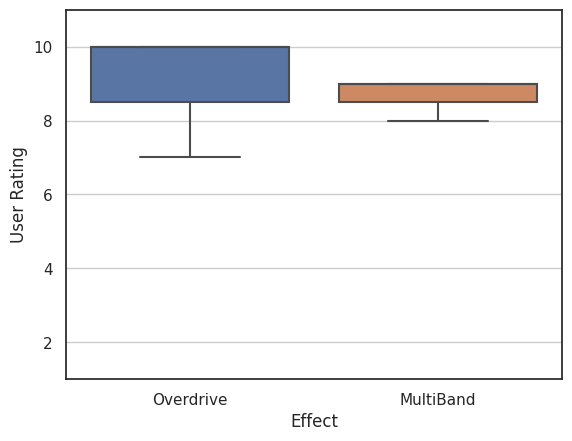

In [35]:
ax = sns.boxplot(df_1, x='effect', y='score')
ax.set_ylim([1, 11])
ax.set_ylabel("User Rating", fontsize=12)
ax.set_xlabel("Effect", fontsize=12)
ax.yaxis.grid(True)
plt.savefig(f"{FIGURE_DIR}/test1_score.pdf")

In [36]:
df_2

,effect,prompt_text,prompt_num,num_attempts,score,id_chosen,comments
0,Overdrive,Apply a small amount of drive to the clean audio,1,2,10,269,NaN
1,Overdrive,Apply as much drive as possible to the clean a...,2,5,8,805,"more overdrive left than right, brighter == mo..."
2,Overdrive,Apply an overdrive setting with lots of high f...,3,1,10,142,NaN
3,Overdrive,Apply an overdrive setting with very little hi...,4,1,10,539,NaN
4,MultiBand,Make the clean audio sound slightly brighter,1,4,7,452,NaN
5,MultiBand,Make the clean audio sound as bright as possible,2,5,9,889,NaN
6,MultiBand,Make the clean audio sound slightly bassier,3,4,9,816,NaN
7,MultiBand,Make the clean audio sound as bassy as possible,4,1,10,394,NaN


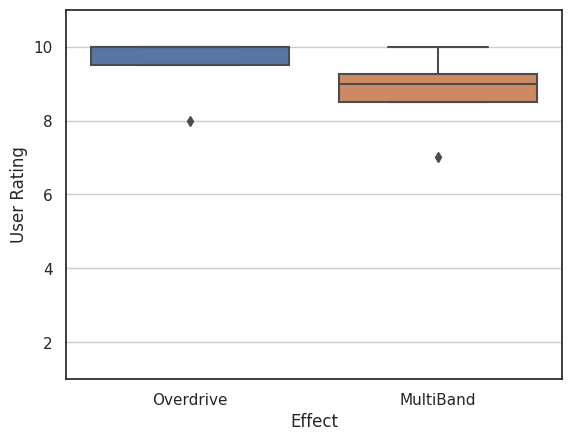

In [38]:
ax = sns.boxplot(df_2, x='effect', y='score')
ax.set_ylim([1, 11])
ax.set_ylabel("User Rating", fontsize=12)
ax.set_xlabel("Effect", fontsize=12)
ax.yaxis.grid(True)
plt.savefig(f"{FIGURE_DIR}/test2_score.pdf")

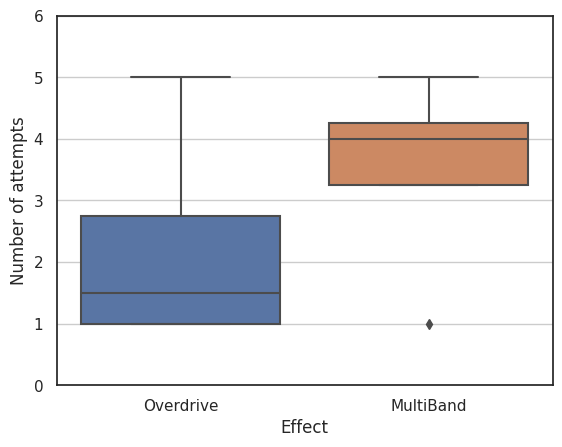

In [40]:
ax = sns.boxplot(df_2, x='effect', y='num_attempts')
ax.set_ylim([0, 6])
ax.set_ylabel("Number of attempts", fontsize=12)
ax.set_xlabel("Effect", fontsize=12)
ax.yaxis.grid(True)
# plt.title("Test 2 (number of attempts)")
plt.savefig(f"{FIGURE_DIR}/test2_attempts.pdf")

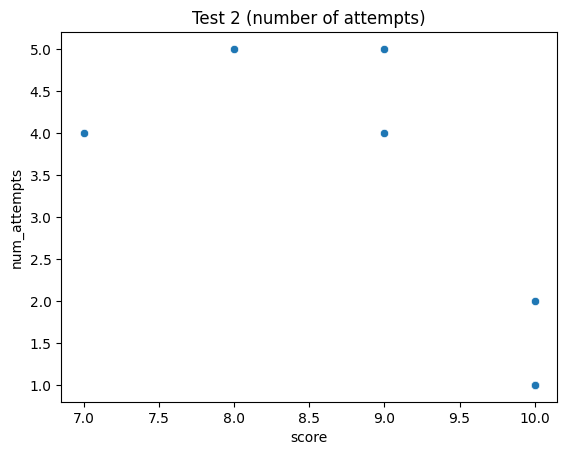

In [62]:
ax = sns.scatterplot(df_2, x='score', y='num_attempts')
plt.title("Test 2 (number of attempts)")
plt.savefig(f"{FIGURE_DIR}/test2_corln.png")

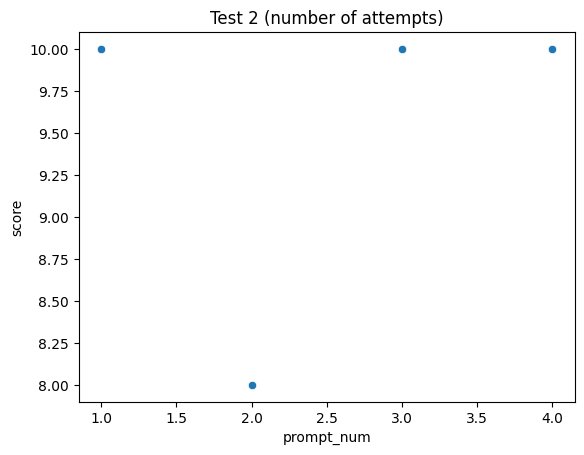

In [67]:
ax = sns.scatterplot(df_2[df_2['effect']=='Overdrive'], x='prompt_num', y='score')
plt.title("Test 2 (number of attempts)")
plt.show()